### Imports

In [1]:
from fastf1.core import Laps
import fastf1 as f1
from fastf1 import plotting
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colormaps
from matplotlib.collections import LineCollection
from matplotlib import colors
import seaborn as sns
import pandas as pd
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)



f1.Cache.enable_cache(r"D:\krusa\Documents\GitHub\Formula1\Cache")
# f1.Cache.clear_cache(r"D:\krusa\Documents\GitHub\Formula1\Cache")

### Session

In [2]:
Year = 2023
GP = "Miami"
Type = "FP2"
session = f1.get_session(Year, GP, Type)
session.load()


core           INFO 	Loading data for Miami Grand Prix - Practice 2 [v2.3.2]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO

In [3]:
FP2 = session
weather = FP2.weather_data
Driver_number = "20"
lap = FP2.laps.pick_driver(Driver_number).pick_fastest()
tel = lap.get_telemetry()

x = np.array(tel["X"].values)
y = np.array(tel["Y"].values)
geo_points = np.array([x,y]).T.reshape(-1,1,2)
segments = np.concatenate([geo_points[:-1], geo_points[1:]], axis=1)
gear = tel['Throttle'].to_numpy().astype(float)


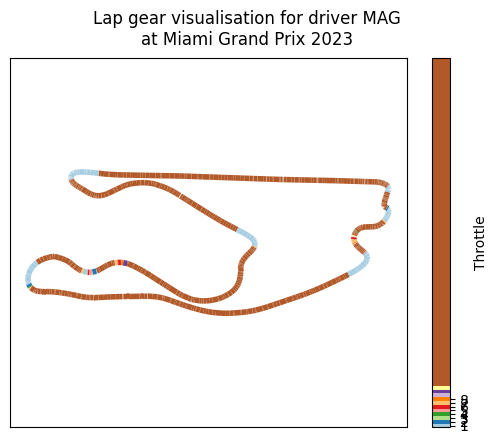

In [4]:
cmap = colormaps.get_cmap("Paired")
lc_comp = LineCollection(segments, norm= plt.Normalize(1,cmap.N + 1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)
plt.gca().add_collection(lc_comp)
plt.axis("equal")
plt.tick_params(labelleft=False,left=False, labelbottom=False,bottom = False)
title = plt.suptitle(
    f"Lap gear visualisation for driver {lap['Driver']} \nat {FP2.event['EventName']} {FP2.event.year} "
)

cbar = plt.colorbar(mappable=lc_comp, label="Throttle", boundaries=np.arange(1, 100))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

In [5]:
FP2 = session
weather = FP2.weather_data
Driver_number = "1"
lap = FP2.laps.pick_driver(Driver_number).pick_fastest()
tel = lap.get_telemetry()

x = np.array(tel["X"].values)
y = np.array(tel["Y"].values)
geo_points = np.array([x,y]).T.reshape(-1,1,2)
segments = np.concatenate([geo_points[:-1], geo_points[1:]], axis=1)
gear = tel['Throttle'].to_numpy().astype(float)


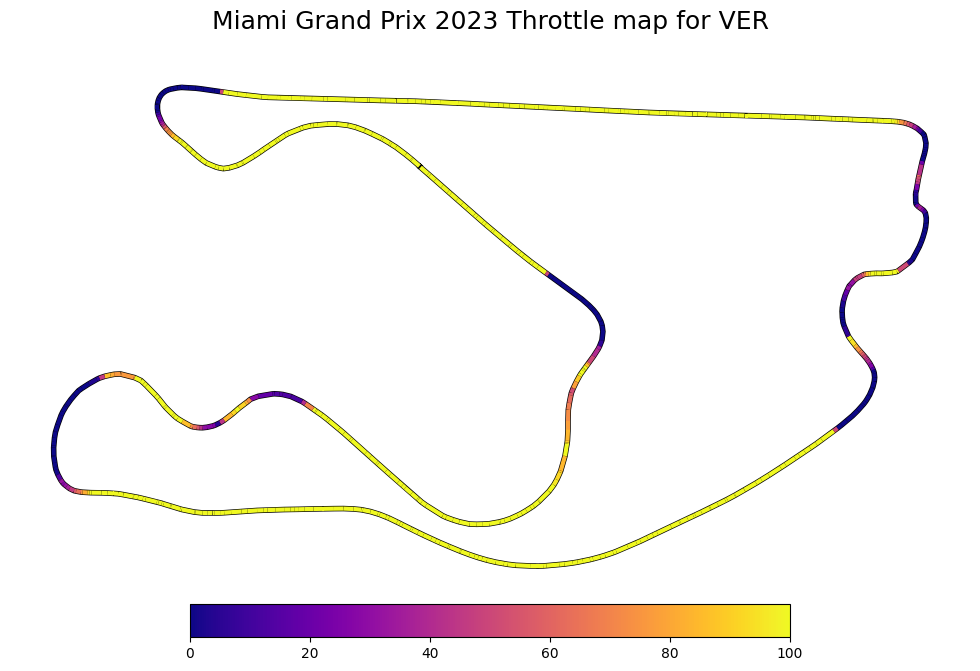

In [6]:
color = tel["Throttle"]
fig, ax = plt.subplots(sharex=True, sharey=True, figsize= (12,6.75))
fig.suptitle(f"{FP2.event['EventName']} {FP2.event.year} Throttle map for {lap['Driver']}", size=18)
ax.plot(x,y, linewidth = 4, zorder=0, color = "black")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')
colormap = colormaps.get_cmap("plasma")
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap = colormap, norm=norm, linestyles = "-", linewidth=3)
lc.set_array(color)
line = ax.add_collection(lc)
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = colors.Normalize(vmin=color.min(), vmax=color.max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap= colormap, orientation="horizontal")
